## Augmentations Visualization

This notebook is dedicated to the visualization of the augmentation transformations that will be used for the model training

Visualization is important to check that the augmentations keep the needed structure to be able to properly detect the tumors, and help the model to generalize without obfuscating much the labels or making the task impossible to solve.

### Imports and constants

In [1]:
import os

os.chdir(os.pardir)
print(os.getcwd())

/Users/humbertoyusta/classes/industrial-ml/brain-tumor-detection


In [62]:
import os
import numpy as np
import preprocessing.data_collector
import preprocessing.data_processor
import preprocessing.constants
import importlib

importlib.reload(preprocessing.data_collector)
importlib.reload(preprocessing.data_processor)
importlib.reload(preprocessing.constants)

<module 'preprocessing.constants' from '/Users/humbertoyusta/classes/industrial-ml/brain-tumor-detection/preprocessing/constants.py'>

### Collect and process the data

In [32]:
collector = preprocessing.data_collector.DataCollector()
collector.run()

processor = preprocessing.data_processor.DataProcessor()
processor.run()

Dataset URL: https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
Initial number of images: 480
Number of corrupted images: 0


/Users/humbertoyusta/classes/industrial-ml/brain-tumor-detection/.venv/lib/python3.11/site-packages/imagededup/methods/hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)


Number of duplicates removed: 263
Number of images after removing corrupted and duplicated images: 217
All images have the same size and number of channels.


(<torch.utils.data.dataloader.DataLoader at 0x17f6335d0>,
 <torch.utils.data.dataloader.DataLoader at 0x17f633210>)

### Plot original images vs augmentation

In [63]:
mean = np.array(preprocessing.constants.MEAN).reshape(3, 1, 1)
std = np.array(preprocessing.constants.STD).reshape(3, 1, 1)


def prepare_image_to_plot(image):
    image_unstandardized = image * std + mean
    image_numpy = np.array(np.transpose(image_unstandardized, (1, 2, 0))) * 255
    image_numpy = np.clip(image_numpy, 0, 255).astype(np.uint8)
    return image_numpy

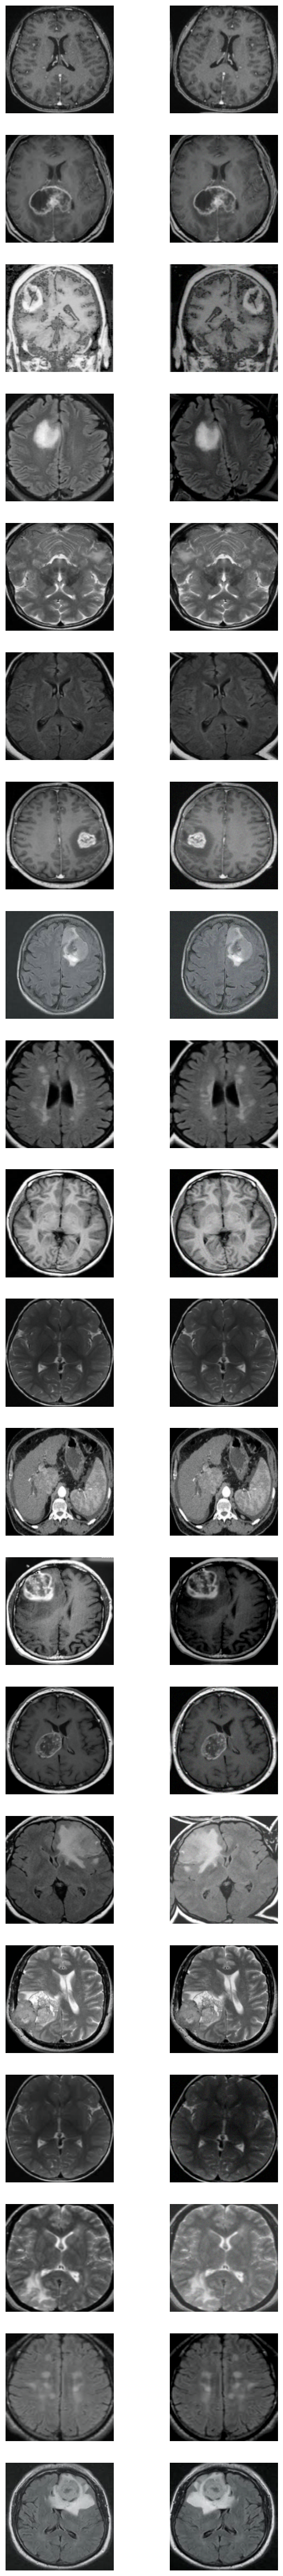

In [64]:
num_images_to_show = 20

images_to_show = processor.images[:num_images_to_show]

original_images = []
augmented_images = []

for image in images_to_show:
    original_images.append(processor.test_transform(image=image))
    augmented_images.append(processor.train_transform(image=image))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(num_images_to_show, 2, figsize=(7, 3 * num_images_to_show))

for i in range(num_images_to_show):
    original_image = prepare_image_to_plot(original_images[i]["image"])
    augmented_image = prepare_image_to_plot(augmented_images[i]["image"])

    axs[i, 0].imshow(original_image)
    axs[i, 1].imshow(augmented_image)

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

We observe that the augmentations change the images, so the model can be more robust to image transformations, noise, our dataset is too small, therefore augmentations play an important role here, but we are careful of not being too aggresive since these are medical images and we should not modify them too much so the problem becomes unsolvable or we don't consider the brain structure properly.